📁 Carpeta de reports: /content/drive/MyDrive/investment_ai/reports
🚀 Iniciando análisis profesional de ETFs - 2025-10-02 10:02:20
📥 Descargando datos...


[                       0%                       ]

[**********            20%                       ]  2 of 10 completed

[**************        30%                       ]  3 of 10 completed

[*******************   40%                       ]  4 of 10 completed

[**********************50%                       ]  5 of 10 completed

[**********************60%****                   ]  6 of 10 completed

[**********************70%*********              ]  7 of 10 completed

[**********************80%*************          ]  8 of 10 completed

[**********************90%******************     ]  9 of 10 completed

[*********************100%***********************]  10 of 10 completed


🔍 Analizando 9 símbolos:
----------------------------------------
Procesando XLK... MFI:64.3 RSC:+7.2 → COMPRAR
Procesando XLY... MFI:54.3 RSC:-0.6 → NEUTRAL
Procesando XLE... MFI:58.9 RSC:-8.0 → NEUTRAL
Procesando XLV... MFI:55.1 RSC:-8.2 → NEUTRAL
Procesando XLF... MFI:42.9 RSC:-5.0 → VENDER
Procesando XLB... MFI:42.6 RSC:-10.0 → VENDER
Procesando XLU... MFI:70.6 RSC:-1.4 → COMPRAR
Procesando TLT... MFI:40.5 RSC:-8.9 → VENDER
Procesando LQD... 

MFI:35.1 RSC:-7.0 → VENDER

📊 RESULTADOS COMPLETOS
SÍMBOLO  SECTOR               SEÑAL           RSC    SHARPE  T200  SCORE
----------------------------------------------------------------------------------------------------
XLK      Tecnología           COMPRAR          +7.2  +0.93 ✅     +2
XLU      Utilidades           COMPRAR          -1.4  +0.62 ✅     +2
XLY      Consumo Discrecional NEUTRAL          -0.6  +0.63 ✅     +0
XLE      Energía              NEUTRAL          -8.0  +0.20 ✅     +0
XLV      Salud                NEUTRAL          -8.2  +0.35 ✅     +0
XLF      Financiero           VENDER           -5.0  +0.06 ✅     -2
LQD      Bonos Corporativos   VENDER           -7.0  +0.61 ✅     -2
TLT      Bonos Largo Plazo    VENDER           -8.9  +0.33 ✅     -2
XLB      Materiales           VENDER          -10.0  -0.17 ✅     -2
✅ Resultados detallados guardados en: /content/drive/MyDrive/investment_ai/reports/sector_analysis_detailed_20251002.csv


✅ Resumen para orquestador: /content/drive/MyDrive/investment_ai/reports/sector_strength_latest.json
💧 Régimen de liquidez (contexto): Contractivo
✅ Señal registrada para evaluación: Comprar XLK (Tecnología) - RSC: +7.2%, MFI: 64.3...
✅ Señal registrada para evaluación: Comprar XLU (Utilidades) - RSC: -1.4%, MFI: 70.6...
✅ Señal registrada para evaluación: Vender XLF (Financiero) - RSC: -5.0%, MFI: 42.9...
✅ Señal registrada para evaluación: Vender LQD (Bonos Corporativos) - RSC: -7.0%, MFI: 35.1...
✅ Señal registrada para evaluación: Vender TLT (Bonos Largo Plazo) - RSC: -8.9%, MFI: 40.5...
✅ Señal registrada para evaluación: Vender XLB (Materiales) - RSC: -10.0%, MFI: 42.6...
✅ Señal registrada para evaluación: Fuerza sectorial: 2 comprar, 4 vender, 3 neutros...

🟢 TOP OPORTUNIDADES (Comprar)
  • XLK (Tecnología) | COMPRAR | RSC: +7.2% | Sharpe: +0.93 | Tendencia: ✅
  • XLU (Utilidades) | COMPRAR | RSC: -1.4% | Sharpe: +0.62 | Tendencia: ✅

🔴 ALERTAS (Vender / Evitar)
  • XLB (Materi

📊 Semáforo guardado: /content/drive/MyDrive/investment_ai/reports/sector_semaforo_20251002.png


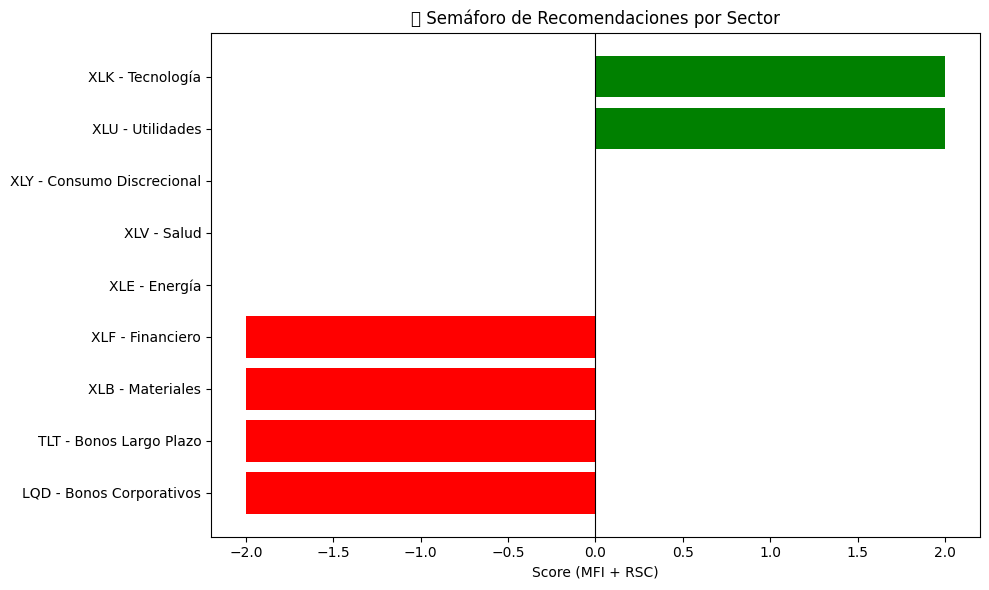

📊 Gráfico MFI-RSC guardado: /content/drive/MyDrive/investment_ai/reports/sector_mfi_rsc_20251002.png


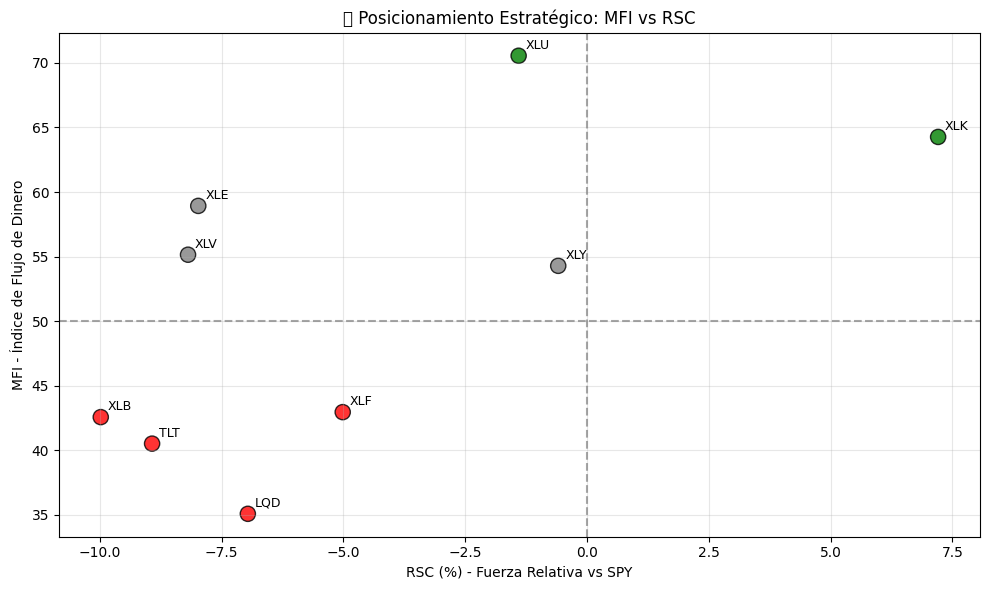

📊 Evolución semanal guardada: /content/drive/MyDrive/investment_ai/reports/sector_evolucion_semanal_20251002.png


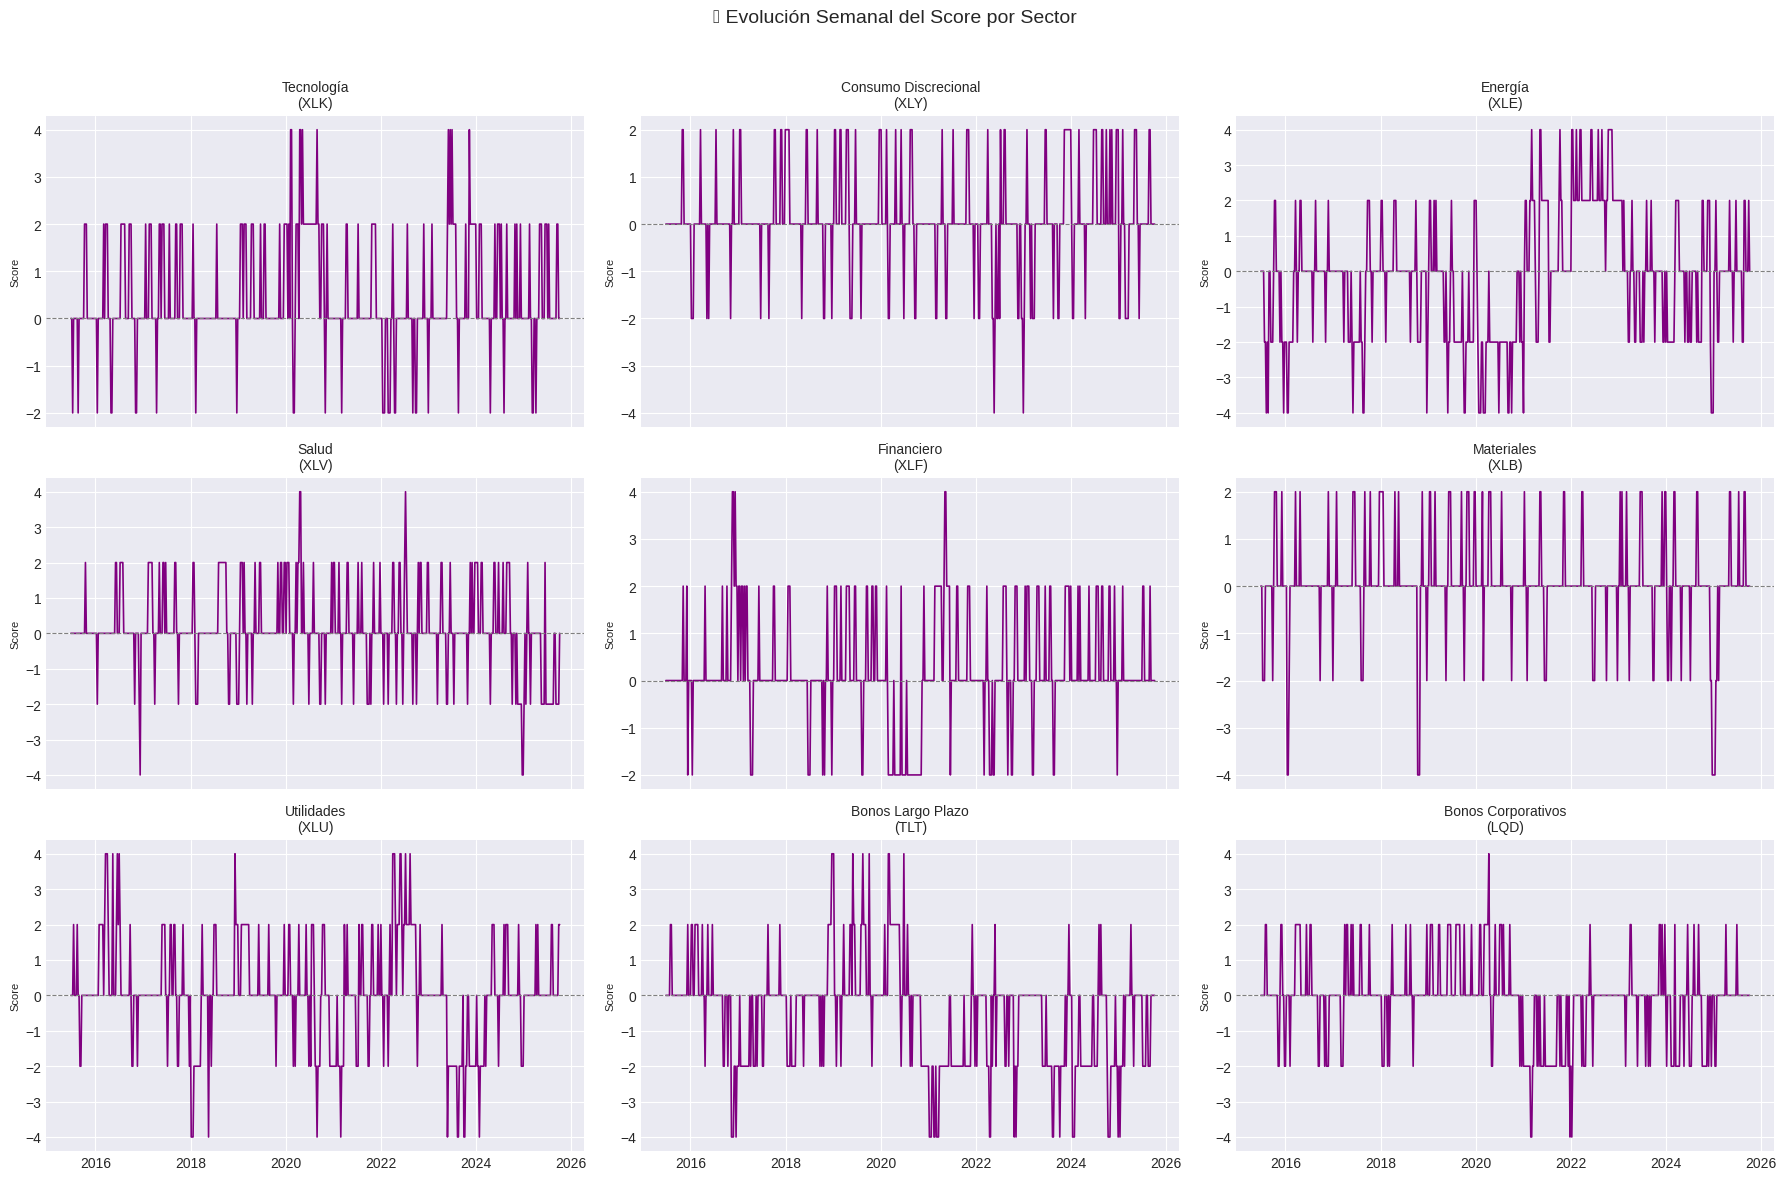


✅ Análisis finalizado a las 2025-10-02 10:02:30


In [1]:
# ============================================
# 12_sectorial_strength.ipynb - Análisis de Fuerza Sectorial (MEJORADO + CONTRATO + LOG)
# ============================================

import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from datetime import datetime
import warnings
import logging

warnings.filterwarnings('ignore')

# === FUNCIÓN PARA REGISTRAR SEÑALES (PARA PERFORMANCE AGENT) ===
def log_signal(
    agente: str,
    tipo_senal: str,
    recomendacion: str,
    contexto: dict = None,
    horizonte_eval: str = "5d",
    metadata: dict = None
):
    """
    Registra una señal emitida por un agente en signals_emitted.csv.
    """
    SIGNALS_LOG_PATH = f"{BASE}/data/signals_emitted.csv"
    os.makedirs(os.path.dirname(SIGNALS_LOG_PATH), exist_ok=True)

    new_row = {
        "fecha_emision": datetime.today().strftime("%Y-%m-%d"),
        "agente": agente,
        "tipo_senal": tipo_senal,
        "recomendacion": recomendacion,
        "contexto_liquidez": contexto.get("liquidez_regime", "N/A") if contexto else "N/A",
        "contexto_mercado": contexto.get("market_regime", "N/A") if contexto else "N/A",
        "horizonte_eval": horizonte_eval,
        "señal_id": f"{agente}_{datetime.today().strftime('%Y%m%d')}_{hash(recomendacion) % 1000:03d}"
    }

    import json as json_lib
    if metadata:
        new_row["metadata"] = json_lib.dumps(metadata, ensure_ascii=False)
    else:
        new_row["metadata"] = "{}"

    # Cargar o crear CSV
    if os.path.exists(SIGNALS_LOG_PATH):
        df = pd.read_csv(SIGNALS_LOG_PATH)
    else:
        df = pd.DataFrame(columns=[
            "fecha_emision", "agente", "tipo_senal", "recomendacion",
            "contexto_liquidez", "contexto_mercado", "horizonte_eval", "señal_id", "metadata"
        ])

    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
    df.to_csv(SIGNALS_LOG_PATH, index=False, encoding="utf-8")
    print(f"✅ Señal registrada para evaluación: {recomendacion[:60]}...")

# === CONFIGURACIÓN ===
TICKERS = {
    "XLK": "Tecnología",
    "XLY": "Consumo Discrecional",
    "XLE": "Energía",
    "XLV": "Salud",
    "XLF": "Financiero",
    "XLB": "Materiales",
    "XLU": "Utilidades",
    "TLT": "Bonos Largo Plazo",
    "LQD": "Bonos Corporativos"
}
BENCHMARK = "SPY"
START = "2015-01-01"
MFI_PERIOD = 14
RSC_PERIOD = 52

# === DETERMINAR RUTA DE REPORTS Y BASE ===
if os.path.exists("/content/drive"):
    BASE = "/content/drive/MyDrive/investment_ai"
    REPORTS_DIR = f"{BASE}/reports"
else:
    BASE = "investment_ai"
    REPORTS_DIR = "reports"
os.makedirs(REPORTS_DIR, exist_ok=True)
print(f"📁 Carpeta de reports: {REPORTS_DIR}")

# === LOGGING ===
log_path = os.path.join(REPORTS_DIR, "sectorial_analysis.log")
logging.basicConfig(filename=log_path, level=logging.INFO,
                    format='%(asctime)s - %(message)s')
logger = logging.getLogger()

# === FUNCIONES DE CÁLCULO ===
def calculate_mfi(data, period=14):
    if len(data) < period + 5:
        return pd.Series(index=data.index, dtype=float)
    tp = (data['High'] + data['Low'] + data['Close']) / 3.0
    mf = tp * data['Volume']
    delta = tp.diff()
    pos_mf = mf.where(delta > 0, 0).rolling(window=period).sum()
    neg_mf = mf.where(delta < 0, 0).rolling(window=period).sum()
    mr = pos_mf / (neg_mf + 1e-10)
    mfi = 100 - (100 / (1 + mr))
    return mfi.fillna(50)

def calculate_rsc(asset_data, benchmark_data, period=52):
    try:
        asset_weekly = asset_data['Close'].resample('W-FRI').last().dropna()
        bench_weekly = benchmark_data['Close'].resample('W-FRI').last().dropna()
        common = asset_weekly.index.intersection(bench_weekly.index)
        if len(common) < period + 10:
            return pd.Series(dtype=float)
        asset_aligned = asset_weekly.reindex(common).ffill()
        bench_aligned = bench_weekly.reindex(common).ffill()
        rs_ratio = asset_aligned / bench_aligned
        rs_ma = rs_ratio.rolling(window=period, min_periods=period//2).mean()
        rsc = ((rs_ratio / rs_ma) - 1) * 100
        return rsc.dropna()
    except Exception as e:
        return pd.Series(dtype=float)

def calculate_additional_metrics(data):
    metrics = {}
    returns = data['Close'].pct_change()
    vol = returns.rolling(20).std().iloc[-1] * np.sqrt(252) * 100 if len(returns) >= 20 else np.nan
    ret_3m = ((data['Close'].iloc[-1] / data['Close'].iloc[-63]) - 1) * 100 if len(data) >= 63 else np.nan

    metrics['volatility'] = vol
    metrics['return_3m'] = ret_3m
    metrics['sharpe_3m'] = ret_3m / vol if vol and vol > 0 else np.nan

    if len(data) >= 20:
        x = np.arange(20)
        y = data['Close'].iloc[-20:].values
        slope = np.polyfit(x, y, 1)[0]
        metrics['trend'] = (slope / data['Close'].iloc[-1]) * 100
    else:
        metrics['trend'] = np.nan

    if len(data) >= 200:
        sma200 = data['Close'].rolling(200).mean().iloc[-1]
        current = data['Close'].iloc[-1]
        metrics['trend_200d'] = "✅" if current > sma200 else "❌"
    else:
        metrics['trend_200d'] = "❓"

    return metrics

def analyze_signal(mfi, rsc, symbol, additional_metrics=None):
    if pd.isna(mfi) or pd.isna(rsc):
        return "SIN DATOS", 0, []
    score = 0
    reasons = []

    if mfi > 70:
        score += 2; reasons.append(f"MFI muy alto ({mfi:.1f})")
    elif mfi > 55:
        score += 1; reasons.append(f"MFI alto ({mfi:.1f})")
    elif mfi < 30:
        score -= 2; reasons.append(f"MFI muy bajo ({mfi:.1f})")
    elif mfi < 45:
        score -= 1; reasons.append(f"MFI bajo ({mfi:.1f})")

    if rsc > 10:
        score += 2; reasons.append(f"Muy superior al mercado ({rsc:+.1f}%)")
    elif rsc > 3:
        score += 1; reasons.append(f"Superior al mercado ({rsc:+.1f}%)")
    elif rsc < -10:
        score -= 2; reasons.append(f"Muy inferior al mercado ({rsc:+.1f}%)")
    elif rsc < -3:
        score -= 1; reasons.append(f"Inferior al mercado ({rsc:+.1f}%)")

    if additional_metrics:
        vol = additional_metrics.get('volatility', 0)
        if vol > 30 and score > 0:
            score = max(0, score - 1)
            reasons.append(f"Penalizado por alta volatilidad ({vol:.1f}%)")

    if score >= 3: signal = "COMPRAR FUERTE"
    elif score >= 2: signal = "COMPRAR"
    elif score == 1: signal = "OBSERVAR +"
    elif score == -1: signal = "OBSERVAR -"
    elif score <= -2: signal = "VENDER"
    elif score <= -3: signal = "VENDER FUERTE"
    else: signal = "NEUTRAL"

    return signal, score, reasons

def get_data():
    all_tickers = list(TICKERS.keys()) + [BENCHMARK]
    print("📥 Descargando datos...")
    data = yf.download(all_tickers, start=START, group_by='ticker')
    data_dict = {}
    for ticker in all_tickers:
        if isinstance(data.columns, pd.MultiIndex):
            df = data[ticker].dropna()
        else:
            df = data.dropna() if ticker == BENCHMARK else pd.DataFrame()
        data_dict[ticker] = df
    return data_dict

def run_detailed_analysis(data_dict):
    benchmark_data = data_dict[BENCHMARK]
    results = []
    print(f"\n🔍 Analizando {len(TICKERS)} símbolos:")
    print("-" * 40)

    for symbol, sector in TICKERS.items():
        print(f"Procesando {symbol}...", end=" ")
        data = data_dict[symbol]
        if data.empty or len(data) < 50:
            print("Sin datos")
            continue

        mfi = calculate_mfi(data, MFI_PERIOD)
        rsc = calculate_rsc(data, benchmark_data, RSC_PERIOD)
        metrics = calculate_additional_metrics(data)

        latest_mfi = mfi.iloc[-1] if not mfi.empty else np.nan
        latest_rsc = rsc.iloc[-1] if not rsc.empty else np.nan

        signal, score, reasons = analyze_signal(latest_mfi, latest_rsc, symbol, metrics)

        results.append({
            'Symbol': symbol,
            'Sector': sector,
            'MFI': latest_mfi,
            'RSC': latest_rsc,
            'Signal': signal,
            'Score': score,
            'Reasons': reasons,
            'Volatility': metrics.get('volatility', np.nan),
            'Return_3M': metrics.get('return_3m', np.nan),
            'Sharpe_3M': metrics.get('sharpe_3m', np.nan),
            'Trend_200d': metrics.get('trend_200d', "❓")
        })
        print(f"MFI:{latest_mfi:.1f} RSC:{latest_rsc:+.1f} → {signal}")
        logger.info(f"{symbol}: MFI={latest_mfi:.1f}, RSC={latest_rsc:+.1f}, Señal={signal}")

    return results

def show_executive_summary(results):
    df = pd.DataFrame(results)
    buy_candidates = df[df['Signal'].isin(['COMPRAR FUERTE', 'COMPRAR'])].copy()
    sell_candidates = df[df['Signal'].isin(['VENDER', 'VENDER FUERTE'])].copy()

    print("\n" + "="*60)
    print("🟢 TOP OPORTUNIDADES (Comprar)")
    print("="*60)
    if not buy_candidates.empty:
        top3 = buy_candidates.nlargest(3, ['Score', 'RSC'])
        for _, r in top3.iterrows():
            print(f"  • {r['Symbol']} ({r['Sector']}) | {r['Signal']} | RSC: {r['RSC']:+.1f}% | Sharpe: {r['Sharpe_3M']:+.2f} | Tendencia: {r['Trend_200d']}")
    else:
        print("  Ninguna señal de compra fuerte.")

    print("\n" + "="*60)
    print("🔴 ALERTAS (Vender / Evitar)")
    print("="*60)
    if not sell_candidates.empty:
        bottom3 = sell_candidates.nsmallest(3, ['Score', 'RSC'])
        for _, r in bottom3.iterrows():
            print(f"  • {r['Symbol']} ({r['Sector']}) | {r['Signal']} | RSC: {r['RSC']:+.1f}% | Sharpe: {r['Sharpe_3M']:+.2f} | Tendencia: {r['Trend_200d']}")
    else:
        print("  Ninguna señal de venta fuerte.")

# === VISUALIZACIONES CON GUARDADO EN REPORTS ===
def plot_semaforo(results):
    df = pd.DataFrame(results)
    df = df.sort_values('Score', ascending=False)

    color_map = {
        'COMPRAR FUERTE': 'darkgreen',
        'COMPRAR': 'green',
        'OBSERVAR +': 'lightgreen',
        'NEUTRAL': 'gray',
        'OBSERVAR -': 'orange',
        'VENDER': 'red',
        'VENDER FUERTE': 'darkred'
    }
    colors = [color_map.get(s, 'gray') for s in df['Signal']]

    plt.figure(figsize=(10, 6))
    bars = plt.barh(df['Symbol'] + " - " + df['Sector'], df['Score'], color=colors)
    plt.axvline(0, color='black', linewidth=0.8)
    plt.xlabel("Score (MFI + RSC)")
    plt.title("🚦 Semáforo de Recomendaciones por Sector")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    filepath = os.path.join(REPORTS_DIR, f"sector_semaforo_{datetime.now().strftime('%Y%m%d')}.png")
    plt.savefig(filepath, dpi=300)
    print(f"📊 Semáforo guardado: {filepath}")
    plt.show()
    plt.close()

def plot_rsc_vs_mfi(results):
    df = pd.DataFrame(results)
    plt.figure(figsize=(10, 6))
    colors = []
    for _, row in df.iterrows():
        if row['Signal'] in ['COMPRAR FUERTE', 'COMPRAR']:
            colors.append('green')
        elif row['Signal'] in ['VENDER', 'VENDER FUERTE']:
            colors.append('red')
        else:
            colors.append('gray')

    plt.scatter(df['RSC'], df['MFI'], c=colors, s=120, edgecolor='k', alpha=0.8)
    plt.axvline(0, color='gray', linestyle='--', alpha=0.7)
    plt.axhline(50, color='gray', linestyle='--', alpha=0.7)
    plt.xlabel("RSC (%) - Fuerza Relativa vs SPY")
    plt.ylabel("MFI - Índice de Flujo de Dinero")
    plt.title("📊 Posicionamiento Estratégico: MFI vs RSC")
    for i, txt in enumerate(df['Symbol']):
        plt.annotate(txt, (df['RSC'].iloc[i], df['MFI'].iloc[i]), textcoords="offset points", xytext=(5,5), fontsize=9)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    filepath = os.path.join(REPORTS_DIR, f"sector_mfi_rsc_{datetime.now().strftime('%Y%m%d')}.png")
    plt.savefig(filepath, dpi=300)
    print(f"📊 Gráfico MFI-RSC guardado: {filepath}")
    plt.show()
    plt.close()

def plot_weekly_evolution(data_dict):
    bench_data = data_dict[BENCHMARK]
    plt.style.use('seaborn-v0_8-darkgrid')
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12), sharex=True)
    axes = axes.flatten()

    for i, (symbol, sector) in enumerate(TICKERS.items()):
        try:
            asset_data = data_dict[symbol]
            if asset_data.empty or len(asset_data) < 100:
                axes[i].set_visible(False)
                continue

            mfi = calculate_mfi(asset_data, MFI_PERIOD).resample('W-FRI').last().rename('MFI')
            rsc = calculate_rsc(asset_data, bench_data, RSC_PERIOD).resample('W-FRI').last().rename('RSC')
            df_comb = pd.concat([mfi, rsc], axis=1).dropna()

            if df_comb.empty:
                axes[i].set_visible(False)
                continue

            score = (df_comb['MFI'] > 70).astype(int) * 2 + (df_comb['MFI'] < 30).astype(int) * (-2) + \
                    (df_comb['RSC'] > 10).astype(int) * 2 + (df_comb['RSC'] < -10).astype(int) * (-2)

            axes[i].plot(score.index, score, color='purple', linewidth=1.2)
            axes[i].axhline(0, color='gray', linestyle='--', linewidth=0.8)
            axes[i].set_title(f"{sector}\n({symbol})", fontsize=10)
            axes[i].set_ylabel("Score", fontsize=8)
        except Exception:
            axes[i].set_visible(False)

    plt.suptitle("📈 Evolución Semanal del Score por Sector", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    filepath = os.path.join(REPORTS_DIR, f"sector_evolucion_semanal_{datetime.now().strftime('%Y%m%d')}.png")
    plt.savefig(filepath, dpi=300)
    print(f"📊 Evolución semanal guardada: {filepath}")
    plt.show()
    plt.close()

def display_results(results):
    df = pd.DataFrame(results)
    df = df.sort_values(['Score', 'RSC'], ascending=[False, False])
    print("\n" + "="*100)
    print("📊 RESULTADOS COMPLETOS")
    print("="*100)
    print(f"{'SÍMBOLO':<8} {'SECTOR':<20} {'SEÑAL':<15} {'RSC':<6} {'SHARPE':<7} {'T200':<5} {'SCORE'}")
    print("-" * 100)
    for _, row in df.iterrows():
        sharpe_str = f"{row['Sharpe_3M']:+6.2f}" if not pd.isna(row['Sharpe_3M']) else "  N/A"
        print(f"{row['Symbol']:<8} {row['Sector']:<20} {row['Signal']:<15} {row['RSC']:+5.1f} {sharpe_str} {row['Trend_200d']:<5} {row['Score']:+2.0f}")

    # Guardar resultados detallados
    today = datetime.now().strftime('%Y%m%d')
    csv_path = os.path.join(REPORTS_DIR, f"sector_analysis_detailed_{today}.csv")
    df.to_csv(csv_path, index=False)
    print(f"✅ Resultados detallados guardados en: {csv_path}")

    # Guardar archivo LATEST para el orquestador (JSON)
    señales_dict = {row['Symbol']: row['Signal'] for _, row in df.iterrows()}
    top_oportunidades = df[df['Signal'].isin(['COMPRAR FUERTE', 'COMPRAR'])]['Symbol'].tolist()
    alertas = df[df['Signal'].isin(['VENDER', 'VENDER FUERTE'])]['Symbol'].tolist()

    sector_summary = {
        "fecha": datetime.now().strftime('%Y-%m-%d'),
        "señales": señales_dict,
        "top_oportunidades": top_oportunidades,
        "alertas": alertas,
        "total_analizados": len(results)
    }

    json_path = os.path.join(REPORTS_DIR, "sector_strength_latest.json")
    with open(json_path, "w") as f:
        json.dump(sector_summary, f, indent=2)
    print(f"✅ Resumen para orquestador: {json_path}")

    # =====================
    # REGISTRAR SEÑALES PARA EVALUACIÓN
    # =====================
    # Leer régimen de liquidez (para contexto en log_signal)
    liquidity_regime = "Neutral"
    liquidity_path = f"{REPORTS_DIR}/liquidity_regime_latest.json"
    if os.path.exists(liquidity_path):
        try:
            with open(liquidity_path, "r") as f:
                liquidity_data = json.load(f)
                liquidity_regime = liquidity_data.get("regimen", "Neutral")
        except Exception:
            pass
    print(f"💧 Régimen de liquidez (contexto): {liquidity_regime}")

    # Registrar señales de compra/venta
    for _, row in df.iterrows():
        if row['Signal'] in ['COMPRAR FUERTE', 'COMPRAR']:
            recomendacion = f"Comprar {row['Symbol']} ({row['Sector']}) - RSC: {row['RSC']:+.1f}%, MFI: {row['MFI']:.1f}"
            log_signal(
                agente="sectorial_strength",
                tipo_senal="compra",
                recomendacion=recomendacion,
                contexto={
                    "liquidez_regime": liquidity_regime,
                    "market_regime": "Ofensivo" if "COMPRAR" in row['Signal'] else "Neutral"
                },
                horizonte_eval="5d",
                metadata={
                    "ticker": row['Symbol'],
                    "sector": row['Sector'],
                    "rsc": float(row['RSC']),
                    "mfi": float(row['MFI']),
                    "score": int(row['Score']),
                    "volatilidad": float(row['Volatility']),
                    "retorno_3m": float(row['Return_3M'])
                }
            )
        elif row['Signal'] in ['VENDER', 'VENDER FUERTE']:
            recomendacion = f"Vender {row['Symbol']} ({row['Sector']}) - RSC: {row['RSC']:+.1f}%, MFI: {row['MFI']:.1f}"
            log_signal(
                agente="sectorial_strength",
                tipo_senal="venta",
                recomendacion=recomendacion,
                contexto={
                    "liquidez_regime": liquidity_regime,
                    "market_regime": "Defensivo" if "VENDER" in row['Signal'] else "Neutral"
                },
                horizonte_eval="5d",
                metadata={
                    "ticker": row['Symbol'],
                    "sector": row['Sector'],
                    "rsc": float(row['RSC']),
                    "mfi": float(row['MFI']),
                    "score": int(row['Score']),
                    "volatilidad": float(row['Volatility']),
                    "retorno_3m": float(row['Return_3M'])
                }
            )

    # Registrar resumen general
    total_compras = len(df[df['Signal'].isin(['COMPRAR FUERTE', 'COMPRAR'])])
    total_ventas = len(df[df['Signal'].isin(['VENDER', 'VENDER FUERTE'])])
    total_neutros = len(df) - total_compras - total_ventas

    recomendacion_general = f"Fuerza sectorial: {total_compras} comprar, {total_ventas} vender, {total_neutros} neutros"
    log_signal(
        agente="sectorial_strength",
        tipo_senal="resumen_general",
        recomendacion=recomendacion_general,
        contexto={
            "liquidez_regime": liquidity_regime,
            "market_regime": "Ofensivo" if total_compras > total_ventas else "Defensivo" if total_ventas > total_compras else "Neutral"
        },
        horizonte_eval="5d",
        metadata={
            "total_analizados": len(df),
            "total_compras": int(total_compras),
            "total_ventas": int(total_ventas),
            "total_neutros": int(total_neutros),
            "top_compras": top_oportunidades,
            "top_ventas": alertas
        }
    )


def main():
    print(f"🚀 Iniciando análisis profesional de ETFs - {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    try:
        data_dict = get_data()
        results = run_detailed_analysis(data_dict)

        if not results:
            print("❌ No se generaron resultados.")
            return

        display_results(results)
        show_executive_summary(results)
        plot_semaforo(results)
        plot_rsc_vs_mfi(results)
        plot_weekly_evolution(data_dict)

        logger.info("✅ Análisis completado con éxito.")

    except KeyboardInterrupt:
        print("\n⏹️ Análisis interrumpido por el usuario.")
    except Exception as e:
        print(f"💥 Error: {e}")
        logger.error(f"Error: {e}", exc_info=True)

    print(f"\n✅ Análisis finalizado a las {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

if __name__ == "__main__":
    main()